# Analysis of The Effects of Drug Testing and Sex on Power Lifting Performance

By: Alexander Straub, Anudeep Metuku

## Introduction

Powerlifting (PL) is a sport in which an athlete performs three barbell lifts, the squat, bench press, and deadlift, with the objective of lifting the maximum weight for each lift. The athletes have three attempts for each lift, and their "total" is the sum of their heaviest completed lift for each movement which the judges deem valid. At a powerlifting meet, an athlete's total will decide their placing in their weight class. There exist weight classes for male and female lifters, and sometimes there are subclasses dependent upon age, such as Men's 83 kg Jr.s, which refers to men between ages 18 and 23.
 
There exist many federations in powerlifting, but the largest in the U.S. are the USAPL (USA Powerlifting) and USPA (US Powerlifting Association). The USAPL is the largest drug-tested federation and the USPA is the largest untested federation. Apart from the minor differences of slightly different types of equipment used (such as the barbell type), the major difference is the drug testing. A popular point of discussion in PL, and sports in general, is the efficacy of drug testing and its effects on performance.

The IPF (International powerlifting federation), is a drug-tested federation that is equivalent to the Olympics in that it is the most prestigious international committee. The IPF holds world championships yearly to which countries send their best lifter per sex-age-weight class. They are a "heavily" drug tested sport with the reputation associated with drug testing being of particular importance.
 
The common thought is that untested federations like USPA have higher totals at the elite level for a given sex and weight class. This is because elite lifters in an untested federation are probably choosing to compete in untested feds to maximize their performance using PEDs whereas elite tested lifters would have a lower performance. Though this belief is common, the talent pool of powerlifting is growing as the sport grows popular. As a result, both tested and untested powerlifting are seeing higher totals over time. In this analysis, we will see the differences in the distribution of totals across the USPA and USAPL across sexes and weight classes. 
 
While less nuanced than drug testing, the effects of sex and weight classes are more substantial. Generally, male lifters have higher amounts of lean body mass when total body weight is equated. Lean body mass is highly correlated with strength performance and is the largest predictor of performance. Thus male lifters tend to be stronger overall at the elite level in a given weight class, and heavier lifters tend to be stronger overall. We will also explore to the extent to which (and contexts under which) these notions are true.

Since the total dataset is very large to work with, and the biggest talent is in the USA, we will look at the USAPL and USPA. In addition, we will look at the IPF to compare USA talent to the aggregate of international talent.

The openpowerlifting.org website is an open-source project that has a record of almost all powerlifting meets in the world with entries representing a lifter and meet combination with relevant information. Below are links to the dataset and supplementary information about powerlifting and relevant research about drug testing and sex effects on performance.

[Description of Dataset](https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html)

[Dataset](https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html)

[USAPL Policies and resources on Anti-Doping](https://www.usapowerlifting.com/drug-testing/)

[IPF Doping policies](https://www.powerlifting.sport/anti-doping/ipf-anti-doping-rules#:~:text=The%20IPF%20Anti%2DDoping%20Rules%20apply%20to%20the%20IPF%2C%20to,to%20be%20bound%20by%20these)

[Powerlifting Federations](https://barbend.com/breaking-down-powerlifting-federations/)

[Drug Testing in Strength Sports](https://www.strongerbyscience.com/steroids-for-strength-sports/)

[Drug Free Muscle and Strength Potential](https://www.strongerbyscience.com/your-drug-free-muscle-and-strength-potential-part-1/)

[Sex Differences in Training : Muscle and Strength](https://www.strongerbyscience.com/strength-training-women/)

[A More Rigorous Analysis of Sex differences in Sports: "Shades of Gray: Sex, Gender, and Fairness in Sport"](https://www.barbellmedicine.com/blog/shades-of-gray-sex-gender-and-fairness-in-sport/)

[Alexander Straub's Github (Code)](https://github.com/as2032/as2032.github.io)

[Get CSV to be able to run the code](https://drive.google.com/drive/folders/13eDSL-BcO_1o5SpBdvgZo2y5qm4NJBdG?usp=sharing)

### First Look at the Data


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bigdf = pd.read_csv("openpowerlifting-2021-12-14-acce0df9.csv")

# getting our dataset as a dataframe and filtering by raw powerlifting and full power meets only

bigdf = bigdf[bigdf.Event == "SBD"]
bigdf = bigdf[bigdf.Equipment == "Raw"]
bigdf = bigdf[bigdf.Dots.notna()]

bigdf.Dots = bigdf.Dots.astype('float64')
bigdf.Tested = bigdf.Tested.replace(np.nan,"No" )




In [181]:

#Extracting Year from date variable for analysis
year = []
dl = bigdf["Date"].to_list()
for i in range(0,len(bigdf.Date)):
    cd = dl[i]
    cy = cd[0:4]
    cy = int(cy)
    year.append(cy) 
# Setting date variable and cleaning up dataset
bigdf["Year"] = year
bigdf.Sex = bigdf.Sex.replace("Mx", np.nan)
bigdf = bigdf[bigdf.Sex.notna()]
#Creating data subsets for plotting and analysis
tested = bigdf.loc[bigdf["Tested"]=="Yes"]
untested = bigdf.loc[bigdf["Tested"]!="Yes"]
uspa = bigdf[bigdf.Federation == "USPA"]
uspa_untested = untested[untested.Federation == "USPA"]
uspa_tested = tested[tested.Federation == "USPA"]
usapl = bigdf[bigdf.Federation == "USAPL"]
usapl_untested = untested[untested.Federation == "USAPL"]
usapl_tested = tested[tested.Federation == "USAPL"]
ipf  = bigdf[bigdf.Federation=="IPF"]
ipf_untested = untested[untested.Federation == "IPF"]
ipf_tested = tested[tested.Federation == "IPF"]
allMale = bigdf[bigdf.Sex=='M']
allFemale = bigdf[bigdf.Sex=='F']
feds = [uspa, usapl, ipf]
test_feds = pd.concat(feds)
lab = ["tested", "untested", "uspa_all", "uspa_untested", "uspa_tested","usapl_all", "usapl_untested", "usapl_tested","ipf_all", "ipf_untested", "ipf_tested"]
info = [tested.shape[0], untested.shape[0],uspa.shape[0], uspa_untested.shape[0],uspa_tested.shape[0],usapl.shape[0], usapl_untested.shape[0], usapl_tested.shape[0],ipf.shape[0], ipf_untested.shape[0], ipf_tested.shape[0]]
d = {"DataSet":lab, "N_obs": info}
desc_df = pd.DataFrame(d)

desc_df



,DataSet,N_obs
0,tested,404127
1,untested,102779
2,uspa_all,78856
3,uspa_untested,60636
4,uspa_tested,18220
5,usapl_all,119219
6,usapl_untested,0
7,usapl_tested,119219
8,ipf_all,6049
9,ipf_untested,12


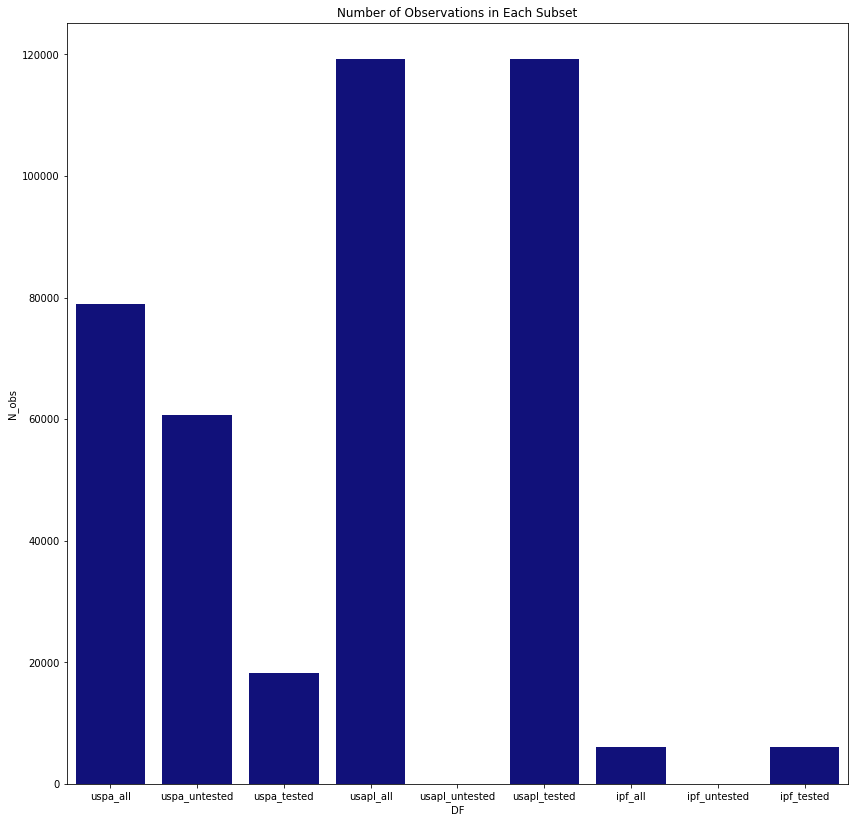

In [179]:
#Visualizing sizes of subsets
import seaborn as sns
plt.figure(figsize = (14,14))
toplot = desc_df.iloc[2:,]
bar1 = sns.barplot(x = "DF", y = "N_obs", data = toplot, color = "darkblue")
plt.title("Number of Observations in Each Subset")
plt.show()



<Figure size 3600x3600 with 0 Axes>

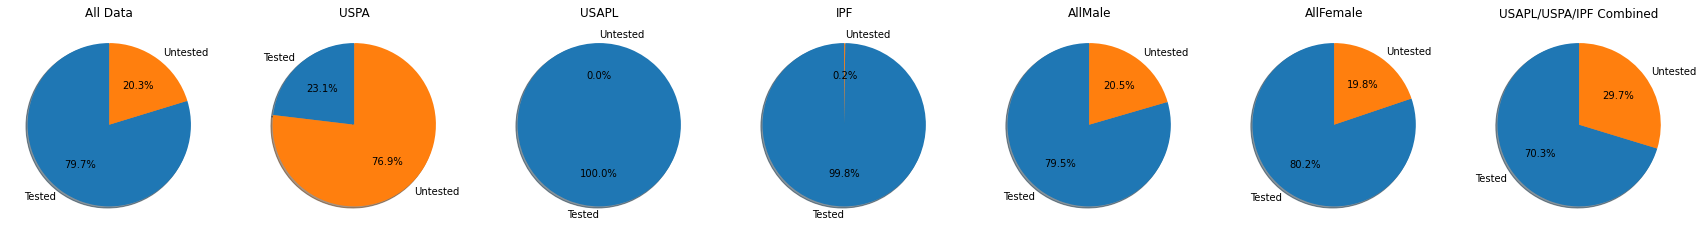

In [ ]:

## Visualizing percentage of tested vs untested lifters in each of our data subsets
labels = 'Tested', 'Untested'
sizes = [len(bigdf.Tested[bigdf.Tested=="Yes"])/len(bigdf.Tested), len(bigdf.Tested[bigdf.Tested!="Yes"])/len(bigdf.Tested)]
plt.figure(figsize = (50,50))
fig1, ax1 = plt.subplots(1,7, figsize=(30,30))
ax1[0].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sizes = [len(uspa.Tested[uspa.Tested=="Yes"])/len(uspa.Tested), len(uspa.Tested[uspa.Tested!="Yes"])/len(uspa.Tested)]
ax1[1].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sizes = [len(usapl.Tested[usapl.Tested=="Yes"])/len(usapl.Tested), len(usapl.Tested[usapl.Tested!="Yes"])/len(usapl.Tested)]
ax1[2].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sizes = [len(ipf.Tested[ipf.Tested=="Yes"])/len(ipf.Tested), len(ipf.Tested[ipf.Tested!="Yes"])/len(ipf.Tested)]
ax1[3].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sizes = [len(allMale.Tested[allMale.Tested=="Yes"])/len(allMale.Tested), len(allMale.Tested[allMale.Tested!="Yes"])/len(allMale.Tested)]
ax1[4].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sizes = [len(allFemale.Tested[allFemale.Tested=="Yes"])/len(allFemale.Tested), len(allFemale.Tested[allFemale.Tested!="Yes"])/len(allFemale.Tested)]
ax1[5].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sizes = [len(test_feds.Tested[test_feds.Tested=="Yes"])/len(test_feds.Tested), len(test_feds.Tested[test_feds.Tested!="Yes"])/len(test_feds.Tested)]
ax1[6].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].title.set_text("All Data")
ax1[1].title.set_text("USPA")
ax1[2].title.set_text("USAPL")
ax1[3].title.set_text("IPF")
ax1[4].title.set_text("AllMale")
ax1[5].title.set_text("AllFemale")
ax1[6].title.set_text("USAPL/USPA/IPF Combined")
plt.show()


In these pie charts, we see that from all the lifter x meet combinations, most of the performances are by tested lifters. And we see that male and female lifters are tested roughly at the same proportion. Drug tested powerlifting appears to be the norm compared to untested PL.

### Violin Plots of Tested vs Untested Powerlifting across USAPL, IPF, and USPA Federations

We will now look at how DOTS (a point rating for powerlifting based on strength, gender, and body weight) is distributed for our 3 federations using violin plots.

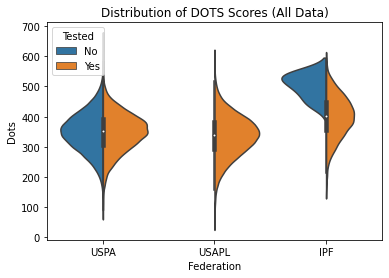

In [ ]:

feds = [uspa, usapl, ipf]
test_feds = pd.concat(feds)
ax = sns.violinplot(x="Federation", y = "Dots", hue = "Tested", split = True, data = test_feds ).set(title = "Distribution of DOTS Scores (All Data)")

Looking at the tested and untested subdivisions of USPA, and the USAPL, we see about the same distribution overall, but we expect that the performances at the top ends of these federations to be different. Since USPA is primarily untested and we are interested in that, we will look at the untested section (and the top section of the USPA) moving forward. The IPF appears to have a higher distribution of DOTS overall than the USPA and USAPL. This is likely due to IPF meets being the prestigious events to which countries send their top lifters per sex/weight class to compete, resulting in the best lifters from the world being represented. Since the untested section of the IPF is a small subset as indicated by the pie charts above (and because we are interested in the aggregate of global data for drug-tested powerlifting), we will use only the tested portion of the IPF moving forward.

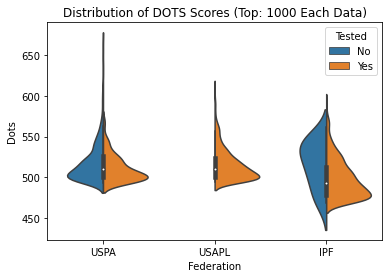

In [ ]:
# Getting subsets of data that contain the top 1000 highest performing lifters from each of the 3 federations (USPA, USAPL, IPF)
top = 1000
bigdf_sorted = bigdf.sort_values(by = ["Dots"], ascending=False)
uspa_sorted = uspa.sort_values(by = ["Dots"], ascending=False)
usapl_sorted = usapl.sort_values(by = ["Dots"], ascending=False)
ipf_sorted = ipf.sort_values(by = ["Dots"], ascending=False)
bigdf_top = bigdf_sorted.iloc[0:top,]
uspa_top = uspa_sorted.iloc[0:top,]
usapl_top = usapl_sorted.iloc[0:top,]
ipf_top =  ipf_sorted.iloc[0:top,]
test_feds = pd.concat(feds)
test_feds_sorted = test_feds.sort_values(by = ["Dots"], ascending=False)
top_each = pd.concat([uspa_top, usapl_top, ipf_top])

#Plotting the distribution of tested vs untested lifters in the top 1k
ax = sns.violinplot(x="Federation", y = "Dots", hue = "Tested", split = True, data = top_each ).set(title = "Distribution of DOTS Scores (Top: "+str(top)+ " Each Data)")



For the top 1000 (from each) USPA, USAPL, and the IPF tested meet performances, we see that there is a roughly normal distribution for tested and untested DOTS performances with a skew towards lower DOTS. This is in line with the belief that much of the talent (even in the top 1000) is concentrated around 500 DOTS which is considered a formidable DOTS score, and DOTS of much higher than 500 are increasingly rare because the population with such performances are outliers among outliers. 

The IPF untested meet performances have a skew to the higher side of DOTS likely due to the smaller amount of lifters competing in untested IPF meets, which are a small subset of IPF meets (which we are not interested in). 

Interestingly, we see that the top 1000 DOTS of tested IPF meets are lower than that of the tested USPA and USAPL lifters. This supports the belief that "if you are a champion in the U.S.A, you are a champion in the world." Note that the IPF meets have a maximum of 1 or 2 lifters from each country per weight+sex class, so the USA lifters will be a small portion of competitors at world stages. We see that the global talent is concentrated in the USA since the totality of top lifters' DOTS in IPF meets have a lower DOTS average.

More importantly, the peak of the violin is highest for the USPA and as we will explore further, this may be due to the top lifters of the USPA being untested and therefore having the highest performances in PL.

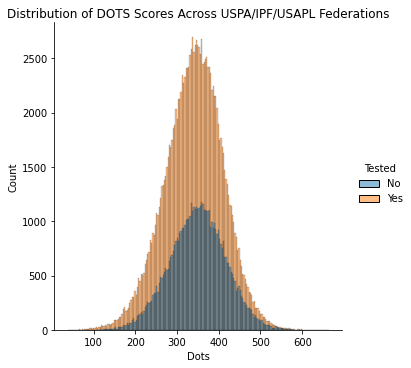

In [ ]:
plot = sns.displot(test_feds, x = "Dots", hue = "Tested").set(title = "Distribution of DOTS Scores Across USPA/IPF/USAPL Federations")

We see that tested and untested performances have a similar bell curve distribution for the right tail (the elite DOTS scores of 500 and above). 

This distribution suggests that even though the absolute highest DOTS are attained by untested lifters (as indicated in the violin plot above the bell curve above), for a very large portion of elite performances, tested lifters are about as likely to have a large DOTS score as untested lifters. 

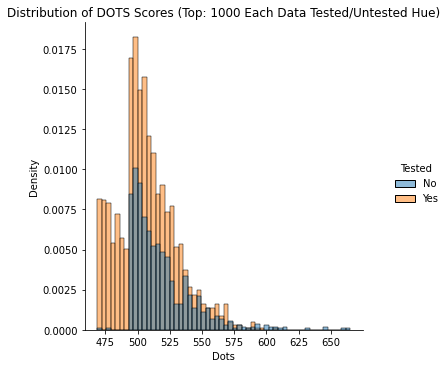

In [ ]:
plot = sns.displot(top_each, x = "Dots", hue = "Tested", stat="density").set(title = "Distribution of DOTS Scores (Top: "+str(top)+ " Each Data Tested/Untested Hue)")

We see that tested and untested performances have a similar bell curve distribution for the right tail (the elite DOTS scores of 475 and above). However, we see a nonexistent amount of DOTS scores for tested performances for DOTS above 575, though the count of the untested performances with DOTS > 575 are less than 25. These short bars on the very right of the bell curve are the most elite world record holders.
 
This distribution suggests that even though the absolute highest DOTS are attained by untested lifters, for a very large portion of elite performances, tested lifters are about as likely to have a large DOTS score as untested lifters. Note : the untested bars being shorter than the tested bars is a result of tested lifters being more numerous than untested lifters as seen in the (first bell curve) above for the distribution of DOTS across ALL tested and untested lifters.


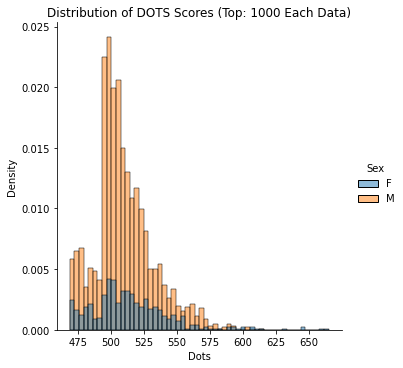

In [ ]:
plot = sns.displot(top_each, x = "Dots", hue = "Sex", stat="density").set(title = "Distribution of DOTS Scores (Top: "+str(top)+ " Each Data M/F Hue)")

Between males and females at the top level, we see a similar relative distribution (so a similar proportion of super elite to elites) but a lot fewer female lifters.

### Scatter Plots of Tested vs Untested Lifters in USAPL, USPA, and IPF


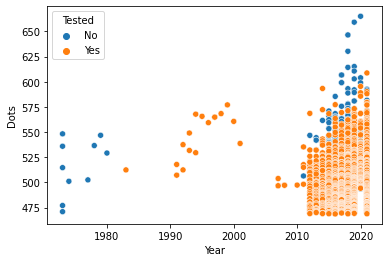

In [ ]:
ax = sns.scatterplot(data = top_each, x = "Year", y = "Dots", hue="Tested")

In this scatter plot, we can see more clearly that the more populous tested lifters are about as likely to have elite dots scores (around 500 and above), the absolute highest dots scores are in meet performances by untested lifters, though these very strong individuals are not nearly as numerous as the rest of the elite lifter population since these are outliers and peak human performance of the times.

### Violin Plots for Changes in DOTS in USAPL, USPA, IPF Federations since 2010

Since we looked at the overall picture for the distribution of DOTS for our 3 feds depending on whether the meets are tested, we should look at how this changes over time since 2010. 2010 is when powerlifting became more mainstream (though it is not quite mainstream even today), so we will focus on this decade.

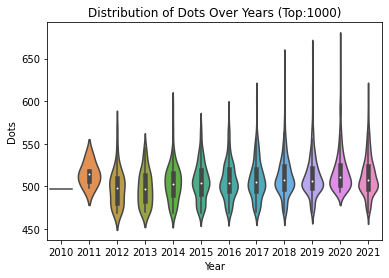

In [ ]:
#Subsetting the data to get data after 2010 since thats where most of the data lies. 
top = 1000
test_feds_a2010 = test_feds.loc[test_feds["Year"]>=2010]
test_feds_a2010_top_each = top_each.loc[top_each["Year"]>=2010]
ax = sns.violinplot(x="Year", y = "Dots", split = True, data = test_feds_a2010_top_each ).set(title = "Distribution of Dots Over Years (Top:" +str(top)+")")


Looking at all the top 1000 meet performances from each of our three federations (USPA, USAPL, IPF), we see that while most elite lifters' DOTS scores have stayed around 500 (given that the violins are thickest at that y value), we see the peak of the violins going up over time. This indicates that lifters have been getting stronger over the years both as a result of better training information and the influx of talent as time passes.

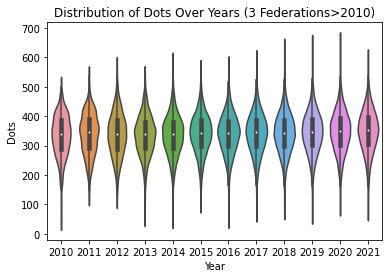

In [ ]:
ax = sns.violinplot(x="Year", y = "Dots", split = True, data = test_feds_a2010 ).set(title = "Distribution of Dots Over Years (3 Federations>2010)")

This violin plot shows the distributions of DOTS in our 3 federations without looking only at the top 1000 DOTS from each federation. We see a much more "normal" distribution for meets each year. The increase in the top DOTS scores is less apparent in this violin plot though we see that the peaks of the violins are going up over the years. More importantly, the average DOTS scores of meets over time has stayed about the same. Since most people competing in powerlifting meets are relatively casual enjoyers who do not have major competitive aspirations, this is expected. 

Now, we will look at the change in the distribution of DOTS score per year over 2010-2021 for the top meet performances of each of our federations to see how whether the federation is drug tested affects the strength increases in elite lifters.

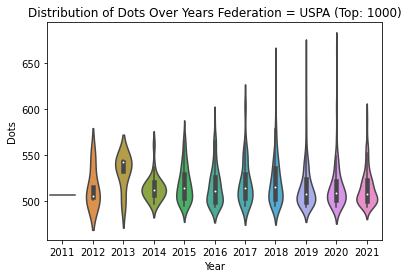

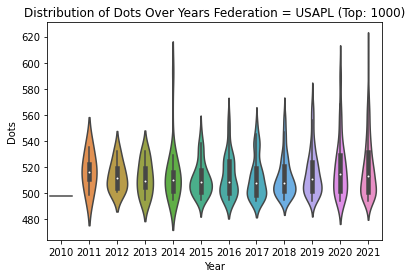

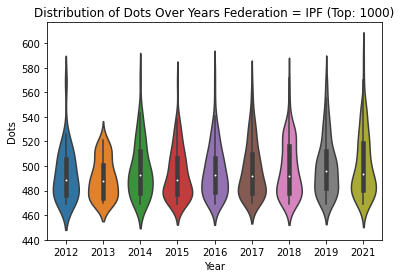

In [ ]:
#Loop to plot distribution of dots per federation
vplot = [uspa_top, usapl_top, ipf_top]
names = ["USPA", "USAPL", "IPF"]
i = 0
for f in vplot:
    fig, ax = plt.subplots()
    f = f.loc[f["Year"]>=2010]
    ax = sns.violinplot(x="Year", y = "Dots", split = True, data = f ).set(title = "Distribution of Dots Over Years Federation = "+ names[i]+" (Top: "+str(top)+")")
    i = i + 1

We see that the rate of growth for the super elites (the meet performances at the top of the violins) is SIMILAR for USPA (which is untested) as the tested USAPL federation. This is true despite the fact that the values of the DOTS themselves are higher in the USPA. This indicates that the talent pool and training information that results in increased performance is not unique to whether a federation is drug tested. Powerlifters in general (the very elite ones) are getting stronger.

More importantly, the discrepancy between the best of the best in the USPA and USAPL indicates that drug use is certainly a contributor to very high DOTS scores. We see about a 30-50 increase in DOTS at the peaks of the violins for the respective years in the USAPL and USPA.

Many lifters in untested feds like the USPA are in fact drug-free. These are some of the reasons:
1. Preference for the equipment or brands: the USPA uses deadlift bars for deadlifts as opposed to stiff bars (used by IPF and USAPL) for their deadlifts, which for some people, is more advantageous as the deadlift bar bends a lot more at heavy-weights. The USPA uses a squat bar as opposed to a stiff bar for their squats. A squat bar has an additional knurl section (the rough part of the barbell) in the center of the barbell shaft. This part of the barbell is in contact with the lifter's upper back during a squat, and many lifters prefer the possibly increased stability squat bars provide during squats due to increased friction between the cloth and barbell.
2. Rules: The USPA also allows lifters to bench press with only the balls of their feet in contact with the ground whereas USAPL requires the whole foot to be in contact with the ground. 
3. Social/geographical reasons: Many people, even elite competitive ones, want to compete with their friends who may be competing at a USAPL/USPA meet, and they may know the person running the meet, or they may be closer to a venue that holds USPA/USAPL meets more frequently than the other.

These reasons are separate from the incentive to maximize performance using PEDs. However, at the very top level, the incentive to take drugs to be as competitive as possible (with lifters in one's weight class as well as their previous selves) is MUCH higher. This data strongly supports this idea.

Note that there is a sharp peak in the year 2014 for USAPL's DOTS that has been unmatched for a while. This was due to a handful of lifters being "popped" (busted in a drug test) in the months following that year. USAPL's drug testing has been growing more stringent as the sport grows popular. Despite this, we see that DOTS of the super-elites have been going up in the USAPL. Some see this as a sign that drug-tested will never mean "drug-free," but we still see a difference in the absolute best between the USPA and USAPL, so drug testing has a major effect on meet performances at the elite level.

### Exploratory Data Analysis for Male vs Female powerlifters in USAPL, USPA, IPF during 2010 - 2021

Now, we will explore the changes in DOTS performance across the sexes for our three federations during the 2010-2021 period.

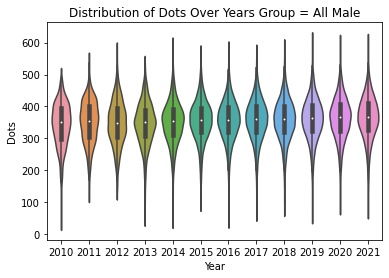

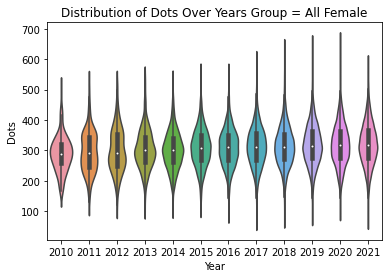

In [ ]:
#Subsetting and loops to get Dots scores over the years Male vs Female
allMale = test_feds.loc[test_feds["Sex"]=='M']
allFemale = test_feds.loc[test_feds["Sex"]=='F']
vplot = [allMale, allFemale]
names = ["All Male", "All Female"]
i = 0
for f in vplot:
    fig, ax = plt.subplots()
    f = f.loc[f["Year"]>=2010]
    ax = sns.violinplot(x="Year", y = "Dots", data = f ).set(title = "Distribution of Dots Over Years Group = "+ names[i])
    i = i + 1

# country_lifters = country_lifters.sort_values(by='Lifters', ascending=False)
#

We see that the peak DOTS over the past decade for males has gone up slightly but more so for females. This is probably because of the uptick of female powerlifters and relatively high influx of talent that was never in the sport (since powerlifting, like other strength sports, is a decreasingly male-dominated sport).

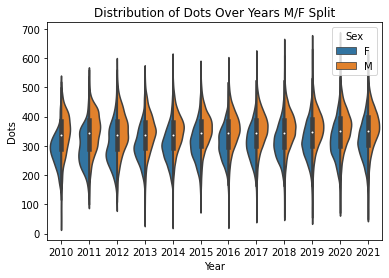

In [ ]:
ax = sns.violinplot(x="Year", y = "Dots", hue = "Sex",split = True, data = test_feds_a2010).set(title = "Distribution of Dots Over Years M/F Split")


Looking at this split violin plot, we see that the average DOTS for male and female powerlifters have been about the same, respectively, as the decade progressed, with the average Female DOTS being slightly lower than the average male DOTS. However, the female DOTS distribution has skewed up over time. That is, there are more elite female powerlifters today than there were 10 years ago. This is the violin plot for all the lifters in our three federations. Let us look at the split violin plot for the top 1000 lifters per federation for our three feds to see if these differences are present in that subset, and to what extent.

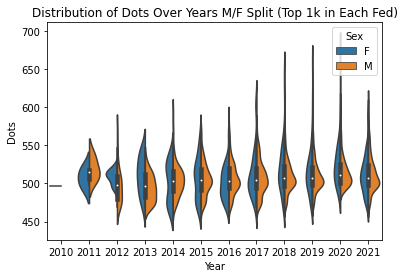

In [ ]:
ax = sns.violinplot(x="Year", y = "Dots", hue = "Sex",split = True, data = test_feds_a2010_top_each).set(title = "Distribution of Dots Over Years M/F Split (Top 1k in Each Fed)")

When looking at just the top 1000 meet performances from each of our federations, we see a more similar distribution of male and female DOTS scores (especially as the past decade progressed). In some cases, such as in 2013, the female DOTS distribution is overall higher (though there are some cases, like 2011, where the male DOTS are higher). However, we see that for most of the years, the male side is thicker in the violins, indicating that at the elite level, even though female lifters have similar performances, there are fewer of them. This is in contrast to the violin plot above the one above, where we see that across our federations, looking at all lifters, there is a roughly similar amount of men and women competing. 

Since muscle mass (lean body mass) is thought to be the primary predictor of strength sport performance, we will now look at male vs female dots over the years for lifters who weigh under 59 kg (130 lbs). This means we are looking at roughly the lightest three weight classes in the USAPL/IPF and USPA.

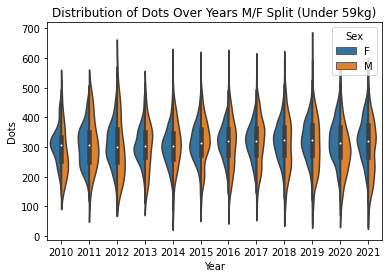

In [ ]:
ax = sns.violinplot(x="Year", y = "Dots", hue = "Sex",split = True, data = test_feds_a2010.loc[test_feds_a2010["BodyweightKg"]<59]).set(title = "Distribution of Dots Over Years M/F Split (Under 59kg)")

Interestingly, we see a relatively similar DOTS distribution between male and female lifters for lightweight (<59 kg>) lifters. We also see that the female sides of the violins are thicker, indicating that more females are competing under 130 lbs (59 kg). This is in line with the female bodyweight distribition skewing toward the lighter weight classes in powerlifting (while most males compete above 66 kg (145 lbs)).

At lower bodyweights, male and female lean body mass (LBM) are more similar compared to higher bodyweights. This is due to there being less relative difference in LBM as a result of low(er) weight to begin weight. To see that at very light bodyweights (relative to other weight classes in PL), that is, when lean body mass is closer to being equated, we see similar performance. Therefore, lean body mass is indeed correlated with performance regardless of whether a lifter is male or female when looking at the total population of lighter lifters in our 3 federations.

## Machine Learning Section

To confirm our hypothesis and beliefs about the relationship between tested and untested lifters as well as differences in performance between sexes, we used various classifiers to predict test status and sex of a given lifter. In our testing, we used RandomForest Classifier, K Nearest Neighbors, and SGD Linear Classifier trained using performance data (DOTS, Bench, Deadlift, Squat, etc.) from the federations USPA, USAPL, and IPF, three of the most complete and well-known federations in the world. Then we tested our models on both the USPA, USAPL, IPF dataset as well as across all of the other federations excluding these three.




### Run #1: 
Using Random Forest Classifier to predict whether a certain individual is tested or untested based on data from a given meet for that individual. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift, and a best lift for each. Using data of three federations (USPA, USAPL, IPF) for both training and test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Setting and subsetting on variables that we will use when training our classifier
vars = ['TotalKg',
'BodyweightKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Tested'
]
vars_only = test_feds_a2010[vars]
vars = vars[0:len(vars)-1]
vars_only = vars_only.dropna()
X=vars_only[['TotalKg',
'BodyweightKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg',  'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg'
]]
y = vars_only.Tested
#Getting random train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Training classifier and extracting feature importance
est = RandomForestClassifier()
est.fit(X_train,y_train)
d={'vars':vars, 'FeatIMP': est.feature_importances_}
featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)
#Using the classifier to predict on our Test data and evaluating its performance
yPred = est.predict(X_test)

In [ ]:
print("Model trained to predict whether a given individual was tested or untested based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction Accuracy in Test Data:")
print(accuracy_score(y_test, yPred))

Model trained to predict whether a given individual was tested or untested based on meet data.

Feature Importances in Prediction (Higher is Better)
               vars   FeatIMP
1      BodyweightKg  0.132583
2              Dots  0.097619
0           TotalKg  0.067208
3          Squat1Kg  0.063300
11      Deadlift1Kg  0.063053
13      Deadlift3Kg  0.062197
4          Squat2Kg  0.061408
5          Squat3Kg  0.061213
9          Bench3Kg  0.060133
12      Deadlift2Kg  0.059292
7          Bench1Kg  0.057592
8          Bench2Kg  0.055169
6      Best3SquatKg  0.054501
14  Best3DeadliftKg  0.053809
10     Best3BenchKg  0.050922

Prediction accuracy in Test Data:
0.9041809817737145


### Run #2: 
Using Random Forest Classifier to predict a certain individuals sex based on data from a given meet for that individual. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift. Using data of three federations (USPA, USAPL, IPF) for both training and test

In [ ]:
#Setting and subsetting on variables that we will use when training our classifier
vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Sex'
]
vars_only = test_feds_a2010[vars]
vars = vars[0:len(vars)-1]
vars_only = vars_only.dropna()
X=vars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg',  'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg'
]]

# X = X.dropna

#Now predicting Sex for a given observation
y = vars_only.Sex
#Getting random train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#Training classifier and extracting feature importance
est = RandomForestClassifier()
est.fit(X_train,y_train)
d={'vars':vars, 'FeatIMP': est.feature_importances_}
featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)
#Using the classifier to predict on our Test data and evaluating its performance
yPred = est.predict(X_test)

In [ ]:
print("Model trained to predict a given individuals sex based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction Accuracy in Test Data:")
print(accuracy_score(y_test, yPred))

Model trained to predict a given individuals sex based on meet data.

Feature Importances in Prediction (Higher is Better)
               vars   FeatIMP
9      Best3BenchKg  0.214651
0           TotalKg  0.155535
1              Dots  0.142991
13  Best3DeadliftKg  0.124619
6          Bench1Kg  0.088962
5      Best3SquatKg  0.058218
10      Deadlift1Kg  0.055493
7          Bench2Kg  0.041135
11      Deadlift2Kg  0.039107
2          Squat1Kg  0.020240
8          Bench3Kg  0.018855
3          Squat2Kg  0.017434
12      Deadlift3Kg  0.013414
4          Squat3Kg  0.009346

Prediction accuracy in Test Data:
0.9737960752343795


### Run #3: 
Using Random Forest Classifier to predict whether a certain individual is tested or untested based on data from a given meet for that individual. This time we remove the variables that the prior model found to be the least important which were the 'best' squat, deadlift, and bench variables. This data now includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift. Using data of three federations (USPA, USAPL, IPF) for both training and test

In [ ]:
#Setting and subsetting on variables that we will use when training our classifier (this time removing variables that previous
# model deemed not as important)
vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg','Tested'
]
vars_only = test_feds_a2010[vars]
vars = vars[0:len(vars)-1]

vars_only = vars_only.dropna()


X=vars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg'
       
]]

tested_train_x = X

y = vars_only.Tested

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


est = RandomForestClassifier()
# classes, y = np.unique(, return_inverse=True)
# y = test_feds_a2010.Tested
est.fit(X_train,y_train)
d={'vars':vars, 'FeatIMP': est.feature_importances_}

featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)
yPred = est.predict(X_test)

In [ ]:
print("Model trained to predict whether a given individual was tested or untested based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction Accuracy in Test Data:")
print(accuracy_score(y_test, yPred))

print("As we can see based on the prediction accuracy, removing the variables that the prior model \nfound to be less useful in prediction did not improve accuracy of the model.")

Model trained to predict whether a given individual was tested or untested based on meet data.

Feature Importances in Prediction (Higher is Better)
           vars   FeatIMP
1          Dots  0.150299
0       TotalKg  0.098348
4      Squat3Kg  0.090404
10  Deadlift3Kg  0.088873
2      Squat1Kg  0.086487
8   Deadlift1Kg  0.085555
3      Squat2Kg  0.084974
7      Bench3Kg  0.082648
9   Deadlift2Kg  0.082405
5      Bench1Kg  0.075523
6      Bench2Kg  0.074485

Prediction accuracy in Test Data:
0.9041797648154616
As we can see based on the prediction accuracy, removing the variables that the prior model 
found to be less useful in prediction did not improve accuracy of the model.


### Run #4: 
Using Random Forest Classifier to predict whether a certain individual is tested or untested based on data from a given meet for that individual. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift and a 'best' lift for each. Using data of three federations (USPA, USAPL, IPF) to train the model, and then testing the model on the data across all other federations, excluding USPA, USAPL, and IPF

In [ ]:

#Setting and subsetting on variables that we will use when training our classifier

vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Tested'
]
vars_only = test_feds_a2010[vars]
vars = vars[0:len(vars)-1]

vars_only = vars_only.dropna()


X=vars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg'
]]
y = vars_only.Tested
#This time training on 95% percent of data and testing on the rest of the data (minus the three federations)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)


est = RandomForestClassifier()
# classes, y = np.unique(, return_inverse=True)
# y = test_feds_a2010.Tested
est.fit(X_train,y_train)
d={'vars':vars, 'FeatIMP': est.feature_importances_}

featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)
vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Tested', "Federation", "Sex", "BodyweightKg"
]
## Getting data to test our model on (minus the three federations that we trained the model on)
bigvars_only = bigdf[vars].dropna()
bigvars_only = bigvars_only.loc[bigvars_only["Federation"]!="USPA"]
bigvars_only = bigvars_only.loc[bigvars_only["Federation"]!="USAPL"]
bigvars_only = bigvars_only.loc[bigvars_only["Federation"]!="IPF"]

#Getting our new test data subset, using the model to predict, and evaluating its accuracy
X_test = bigvars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg']]
yPred = est.predict(X_test)
# accuracies.append(accuracy_score(y_test, yPred))
# accuracy_score(bigvars_only.Tested, yPred)

In [ ]:
print("Model trained to predict whether a given individual was tested or untested based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction Accuracy in Test Data:")
print(accuracy_score(bigvars_only.Tested, yPred))

Model trained to predict whether a given individual was tested or untested based on meet data.

Feature Importances in Prediction (Higher is Better)
               vars   FeatIMP
1              Dots  0.126445
0           TotalKg  0.079596
2          Squat1Kg  0.074943
10      Deadlift1Kg  0.073224
4          Squat3Kg  0.071680
3          Squat2Kg  0.070884
12      Deadlift3Kg  0.069072
11      Deadlift2Kg  0.068182
8          Bench3Kg  0.065107
6          Bench1Kg  0.063934
5      Best3SquatKg  0.061847
13  Best3DeadliftKg  0.060536
7          Bench2Kg  0.059944
9      Best3BenchKg  0.054605

Prediction accuracy in Test Data:
0.8390397293804456


### Run #5: 
Using K Nearest Neighbors to predict whether a certain individual is tested or untested based on data from a given meet for that individual. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift and a 'best' lift for each. Using data of three federations (USPA, USAPL, IPF) to train the model, and then testing the model on the data across all other federations, excluding USPA, USAPL, and IPF

In [ ]:
#Using K nearest neighbors to predict tested vs untested, trained on the 3 federation data, tested on the rest (minus 3 federations)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
yPred = knn.predict(X_test)

In [ ]:
print("Model trained to predict whether a given individual was tested or untested based on meet data.\n")
print("Prediction Accuracy in Test Data:")
print(accuracy_score(bigvars_only.Tested, yPred))

Model trained to predict whether a given individual was tested or untested based on meet data.

Prediction accuracy in Test Data:
0.8245796880490259


### Run #6: 
Using SDG Linear Classifier to predict whether a certain individual is tested or untested based on data from a given meet for that individual. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift and a 'best' lift for each. Using data of three federations (USPA, USAPL, IPF) to train the model, and then testing the model on the data across all other federations, excluding USPA, USAPL, and IPF

In [ ]:
#Using SGD classifier to predict tested vs untested, trained on the 3 federation data, tested on the rest (minus 3 federations)
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = SGDClassifier(max_iter=10000, tol=1e-3)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [ ]:
print("Model trained to predict whether a given individual was tested or untested based on meet data.\n")
print("Prediction Accuracy in Test Data:")
print(accuracy_score(bigvars_only.Tested, ypred))

Model trained to predict whether a given individual was tested or untested based on meet data.

Prediction accuracy in Test Data:
0.8378605332586906


### Run #7: 
Using Random Forest Classifier to predict a certain individuals sex based on data from a given meet for that individual. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift. Using data of three federations (USPA, USAPL, IPF) to train the model, and then testing the model on the data across all other federations, excluding USPA, USAPL, and IPF

In [ ]:
#Setting and subsetting on variables that we will use when training our classifier
vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Sex'
]
vars_only = test_feds_a2010[vars]
vars = vars[0:len(vars)-1]

vars_only = vars_only.dropna()
X=vars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg',  'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg'
]]
#Now predicting sex 
y = vars_only.Sex
#Getting random training data (training on 95% of 3 federation data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
est = RandomForestClassifier()

#Fitting model, extracting feature importance, using it to predict on large dataset(minus 3 federations), and testing accuracy
est.fit(X_train,y_train)

d={'vars':vars, 'FeatIMP': est.feature_importances_}

featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)

#Getting test data from large df
X_test = bigvars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg']]
yPred = est.predict(X_test)
# accuracies.append(accuracy_score(bigvars_only.Sex, yPred))
# accuracy_score(bigvars_only.Sex, yPred)



In [ ]:
print("Model trained to predict a given individuals sex based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction Accuracy in Test Data:")
print(accuracy_score(bigvars_only.Sex, yPred))

Model trained to predict a given individuals sex based on meet data.

Feature Importances in Prediction (Higher is Better)
               vars   FeatIMP
9      Best3BenchKg  0.201681
1              Dots  0.140701
0           TotalKg  0.140384
13  Best3DeadliftKg  0.125407
6          Bench1Kg  0.087372
5      Best3SquatKg  0.062490
7          Bench2Kg  0.056738
10      Deadlift1Kg  0.049612
11      Deadlift2Kg  0.044674
2          Squat1Kg  0.026217
3          Squat2Kg  0.021519
8          Bench3Kg  0.020133
4          Squat3Kg  0.011647
12      Deadlift3Kg  0.011426

Prediction accuracy in Test Data:
0.9720744918438935


### Run #8: 
Using Random Forest Classifier to predict a certain individuals sex based on data from a given meet for that individual, where all individuals are <59kg. This data includes TotalKg lifted, Bodyweight, DOTS score, and 3 readings of each squat, bench and deadlift. Using data of three federations (USPA, USAPL, IPF) to train the model, and then testing the model on the data across all other federations, excluding USPA, USAPL, and IPF

In [ ]:
#Setting and subsetting on variables that we will use when training our classifier
vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Sex'
]
vars_only = test_feds_a2010.loc[test_feds_a2010["BodyweightKg"]<59]
vars_only = vars_only[vars]
vars = vars[0:len(vars)-1]

vars_only = vars_only.dropna()
X=vars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg',  'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg'
]]
#Now predicting sex 
y = vars_only.Sex
#Getting random training data (training on 95% of 3 federation data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
est = RandomForestClassifier()
bigvars_only_light = bigvars_only.loc[bigvars_only["BodyweightKg"]<59]

#Fitting model, extracting feature importance, using it to predict on large dataset(minus 3 federations), and testing accuracy
est.fit(X_train,y_train)

d={'vars':vars, 'FeatIMP': est.feature_importances_}

featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)

#Getting test data from large df
X_test = bigvars_only_light[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg']]
yPred = est.predict(X_test)

In [ ]:
print("Model trained to predict a given individuals sex based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction Accuracy in Test Data:")
print(accuracy_score(bigvars_only_light.Sex, yPred))

Model trained to predict a given individuals sex based on meet data.

Feature Importances in Prediction (Higher is Better)
               vars   FeatIMP
1              Dots  0.384190
0           TotalKg  0.110635
9      Best3BenchKg  0.092858
6          Bench1Kg  0.065627
13  Best3DeadliftKg  0.063549
8          Bench3Kg  0.040465
7          Bench2Kg  0.040108
10      Deadlift1Kg  0.036257
11      Deadlift2Kg  0.034220
5      Best3SquatKg  0.033748
12      Deadlift3Kg  0.028577
3          Squat2Kg  0.026755
2          Squat1Kg  0.024415
4          Squat3Kg  0.018595

Prediction accuracy in Test Data:
0.9839287443121308


### Run #9: 
In an attempt to fine tune our RandomForest Classifier, we used RandomSearchCv to test all possible combinations of relevant hyperparameters of the RandomForest Classifier. 

In [ ]:
#Attempting to use randomized search to find the best combination of hyperparameters to predict tested vs untested for Random Forest

from sklearn.model_selection import RandomizedSearchCV

#Creating lists of available hyperparameters and putting them into dictionary
n_est = list(range(100,1000, 10))
feats = ['auto', 'sqrt']
depth = list(range(10,200,10))
depth.append(None)
sampSplit = [2,5,10,20]
sampLeaf = [1,2,4,6, 8]
bootstrap = [True, False]
random_state = [0]
parameters = {
    'n_estimators': n_est,
               'max_features': feats,
               'max_depth': depth,
               'min_samples_split': sampSplit,
               'min_samples_leaf': sampLeaf,
               'bootstrap':bootstrap,
               'random_state':random_state
}

vars = ['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg','Tested'
]
vars_only = test_feds_a2010[vars]
vars = vars[0:len(vars)-1]

vars_only = vars_only.dropna()


X=vars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg'
]]
y = vars_only.Tested

# X = tested_train_x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)


# #Using Randomized Search to test all possible hyperparameters
reg = RandomForestClassifier()
random_s = RandomizedSearchCV(estimator = reg, param_distributions = parameters, n_iter = 10, cv = 5,  random_state=0, n_jobs = -1)

#Fitting our data to the random sesrch to get the best model, predicting on our test set, and outputing accuracy 
model = random_s.fit(X_train[0:3000],y_train[0:3000])
X_test = bigvars_only[['TotalKg',
'Dots',
'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg',  'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg']]
pred = model.predict(X_test)

In [ ]:
print("Best Parameters Based on Randomized Search\n")
print(model.best_params_)
est = RandomForestClassifier(random_state=0, n_estimators=630,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=120, bootstrap=True, n_jobs=-1)

est.fit(X_train[0:3000],y_train[0:3000])
d={'vars':vars, 'FeatIMP': est.feature_importances_}

pred = est.predict(X_test)
featureIMP = pd.DataFrame(d)
featureIMP = featureIMP.sort_values(by='FeatIMP', ascending=False)
print("Model trained to predict whether a given individual was tested or untested based on meet data.\n")
print("Feature Importances in Prediction (Higher is Better)")
print (featureIMP)
print("\nPrediction accuracy in Test Data:")
print(accuracy_score(bigvars_only.Tested, pred))
# imp_feature_lists.append(featureIMP)

Best Parameters Based on Randomized Search

{'random_state': 0, 'n_estimators': 630, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}
Model trained to predict whether a given individual was tested or untested based on meet data.

Feature Importances in Prediction (Higher is Better)
               vars   FeatIMP
1              Dots  0.113862
0           TotalKg  0.077188
8          Bench3Kg  0.075298
12      Deadlift3Kg  0.074307
10      Deadlift1Kg  0.071354
6          Bench1Kg  0.071264
4          Squat3Kg  0.067750
7          Bench2Kg  0.066792
13  Best3DeadliftKg  0.066681
11      Deadlift2Kg  0.064914
3          Squat2Kg  0.064246
2          Squat1Kg  0.064107
9      Best3BenchKg  0.063567
5      Best3SquatKg  0.058670

Prediction accuracy in Test Data:
0.8391350179559409


## Machine Learning Conclusion:

Models trained to predict tested status had very high accuracy across the board.Random Forest Classifier had the highest prediction accuracy in this case, ~90.4% when testing on the combined three federation data (USPA, USAPL, IPF) and ~83.9% when testing on all other federations excluding the three we trained the model with. This confirms our beliefs that there is a discernable  difference in performance between tested and untested lifters. 

Models trained to predict sex had even higher accuracy than those predicting testing status. Random Forest Classifier returned >97% accuracy when trained on the combined three federation data and tested on both the combined federation data and the data excluding the three federations we trained on. This confirms our beliefs about there being a significant difference between male and female lifters based on their performance. 

Based on our exploratory data analysis, we hypothesized that for lifters under 59 kg, female lifters generally had equal or higher performance (in terms of DOTS) than males. When we trained and tested a RandomForestClassifier on solely lifters under 59kg, we saw that DOTS was highly predictive in the model's feature importance list. This suggests that our hypothesis was correct in its assumption that for lightweight lifters performance and sex are more correlated. However, for under 59 kg, this correlation may have more underlying nuance. Note that from our final violin plot before Machine Learning, we see that female/male performance under 59kg is very similar if not favoring females, and we see that many more females than males compete under 59 kg. 


